In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Extract the data from the CSV

In [2]:
crime_df = pd.read_csv('C:\\Users\\rchauhan\\Desktop\\Springboard Materials\\Capstone Project 2\\Crime_Data_from_2010.csv')
crime_df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,101822289,11/11/2010,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,01/11/2014,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"


Get the total number of rows and columns in the data

In [3]:
crime_df.shape

(1692056, 26)

In [4]:
crime_df.columns

Index(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Premise Description',
       'Weapon Used Code', 'Weapon Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3',
       'Crime Code 4', 'Address', 'Cross Street', 'Location '],
      dtype='object')

What are different categories of Victim Sex and how many cases they have.

In [5]:
crime_df.groupby('Victim Sex')['DR Number'].count()

Victim Sex
-         1
F    719157
H        56
M    788015
X     28846
Name: DR Number, dtype: int64

We can see case reported for Male & Female victims are almost same with Male victims slightly higher. There are other categories also like H and X. Need to clasify them. 

In [7]:
crime_df['DR Number'].nunique()

1692056

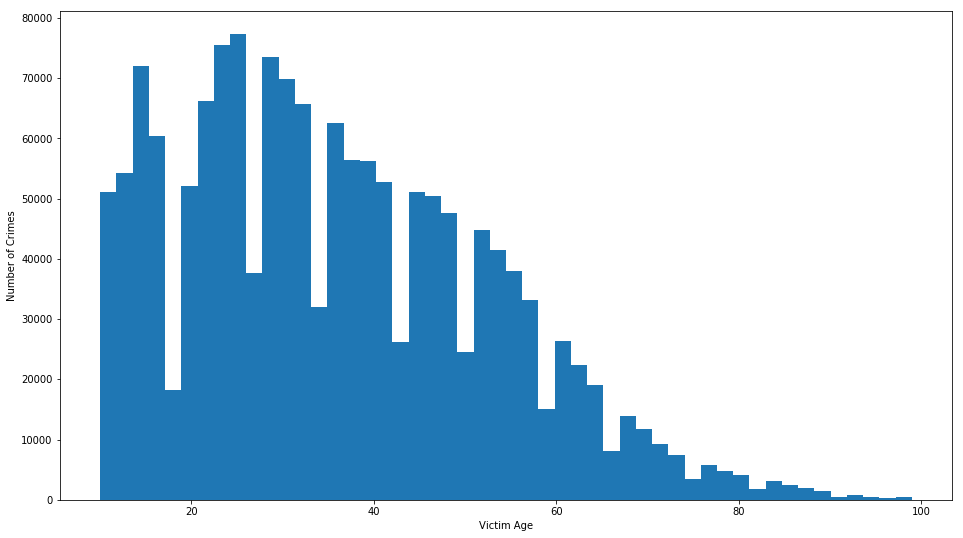

In [32]:
plt.figure(figsize=(16,9))
plt.hist(crime_df['Victim Age'].dropna().values,bins=50)
plt.xlabel('Victim Age')
plt.ylabel('Number of Crimes')
plt.show()

Most number of crimes happened between the age 20 & 30

In [27]:
crime_df['Victim Descent'].dropna().value_counts()

H    585667
W    416373
B    271192
O    163521
X     47502
A     39894
K      7564
F      1991
I       716
C       645
P       295
J       250
U       156
V        92
G        70
Z        59
S        26
D        15
L        10
-         1
Name: Victim Descent, dtype: int64

Most of the victims are Hispanic, White & Black

In [38]:
df = crime_df[['Victim Age','Victim Descent']]
df = df.dropna()
df = df.groupby('Victim Descent')['Victim Age'].mean().reset_index()
df.columns = ['Victim Descent', 'Mean Age']
df = df.sort_values(by='Mean Age',ascending=False)

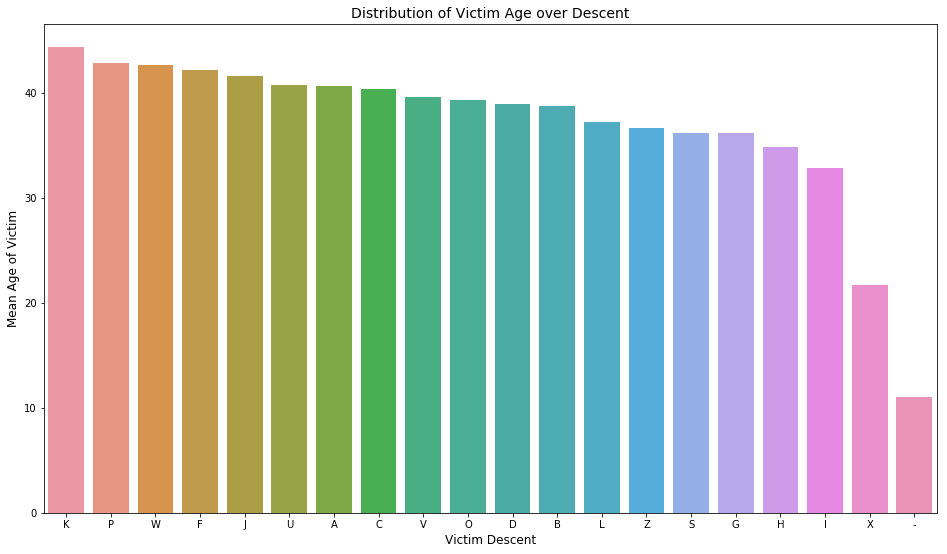

In [39]:
plt.figure(figsize=(16,9))
sns.barplot(df['Victim Descent'],df['Mean Age'])
plt.xlabel('Victim Descent',fontsize = 12)
plt.ylabel('Mean Age of Victim',fontsize = 12)
plt.title('Distribution of Victim Age over Descent',fontsize = 14)
plt.show()